## Gradients

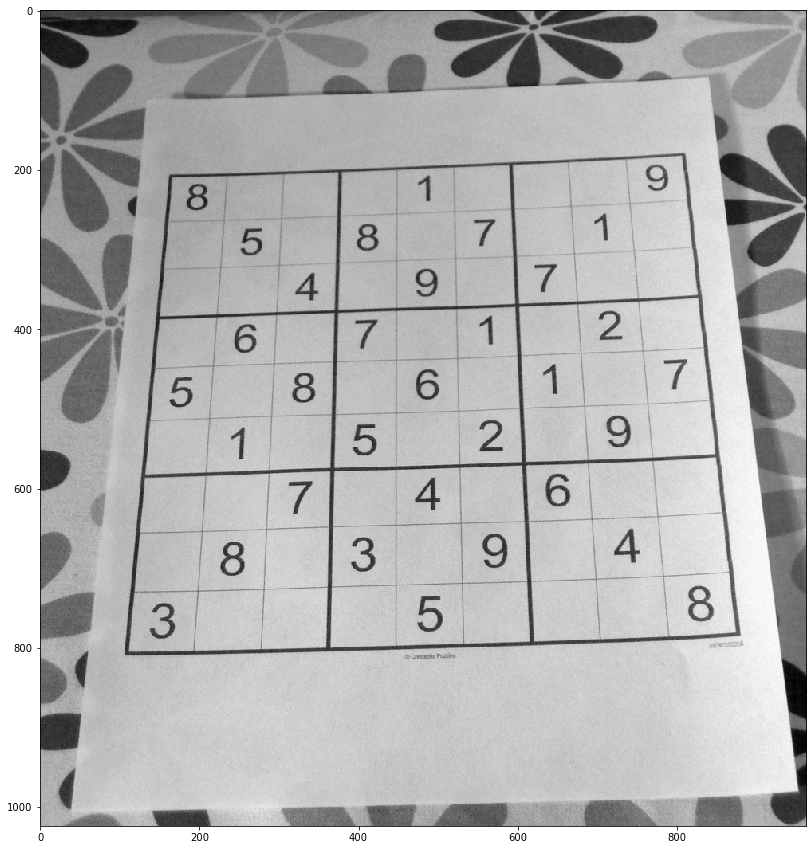

In [1]:
# Sobel - Feldman operators are used here
# Gx = [[1, 0, -1], [2, 0, -2], [1, 0, -1]] - horizontal sobel detector, detects vertical edges
# Gy = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]] - vertical sobel detector, detects horizontal edges

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def_path = 'DATA/sudoku.jpg'

def load_img(path = def_path, type = 'gray'):
    if(type == 'gray'):
        img = cv2.imread(path, 0)
    else:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def disp(img, type = 'gray'):
    fig = plt.figure(figsize = (15, 15))
    ax = fig.add_subplot(111)
    if(type == 'gray'):
        ax.imshow(img, cmap = 'gray')
    else:
        ax.imshow(img)

img = load_img()
disp(img)

### 1. X gradient Sobel

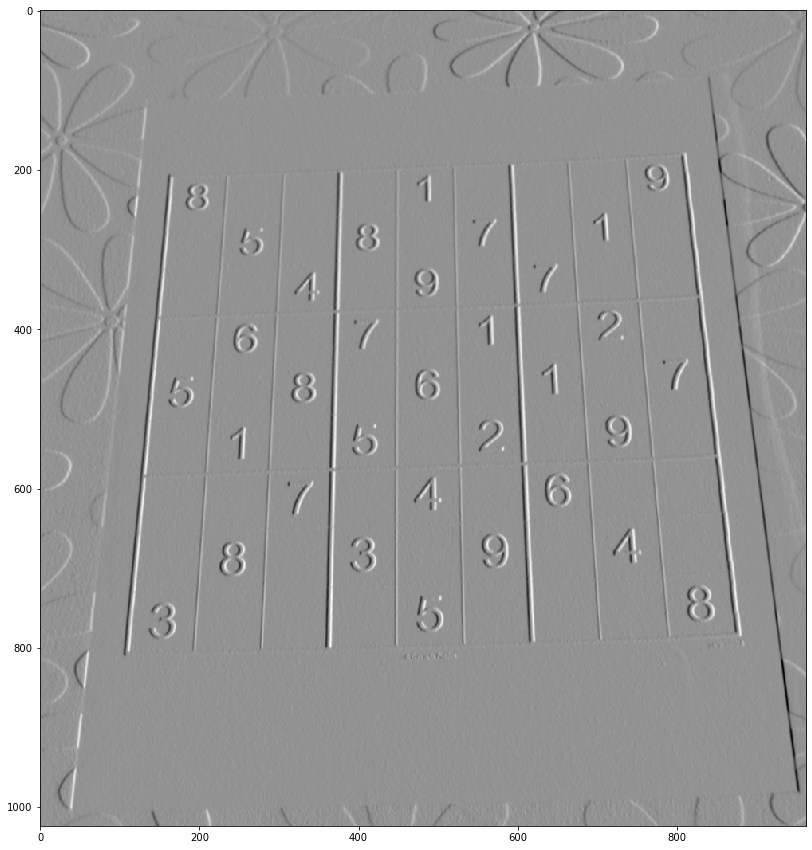

In [2]:
sob_img_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 5)
disp(sob_img_x)

### 2. Y gradient Sobel

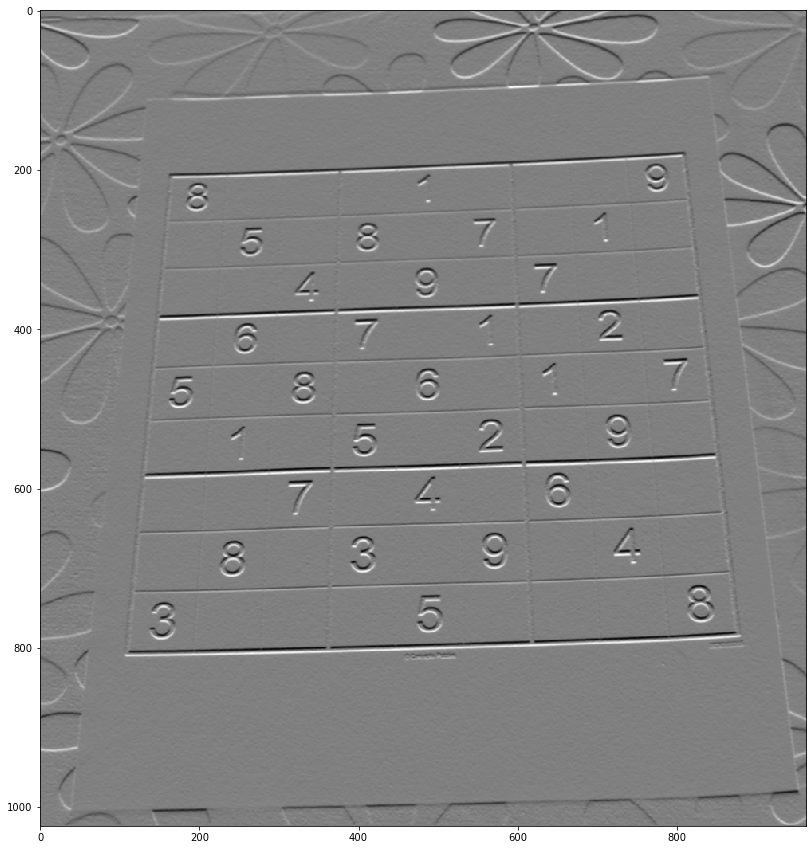

In [3]:
sob_img_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 5)
disp(sob_img_y)

### 3. Laplacian Derivative
[Check wiki page](https://en.wikipedia.org/wiki/Laplace_operator)

In [6]:
# Significance:
# 1. Can be used to perform a Sobel operation on both the x and y coordinate directions
# 2. takes the 2nd derivative of the gradients considered independly over the x and y directions

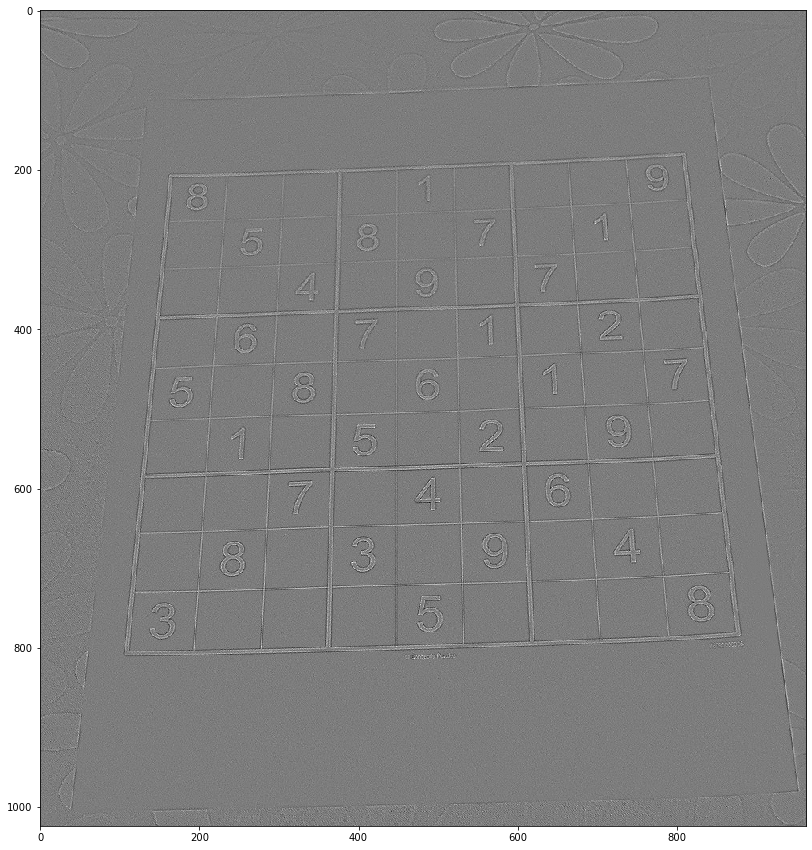

In [7]:
lap_img = cv2.Laplacian(img, cv2.CV_64F)
disp(lap_img)

### 4. Blending Sobel y and x gradients

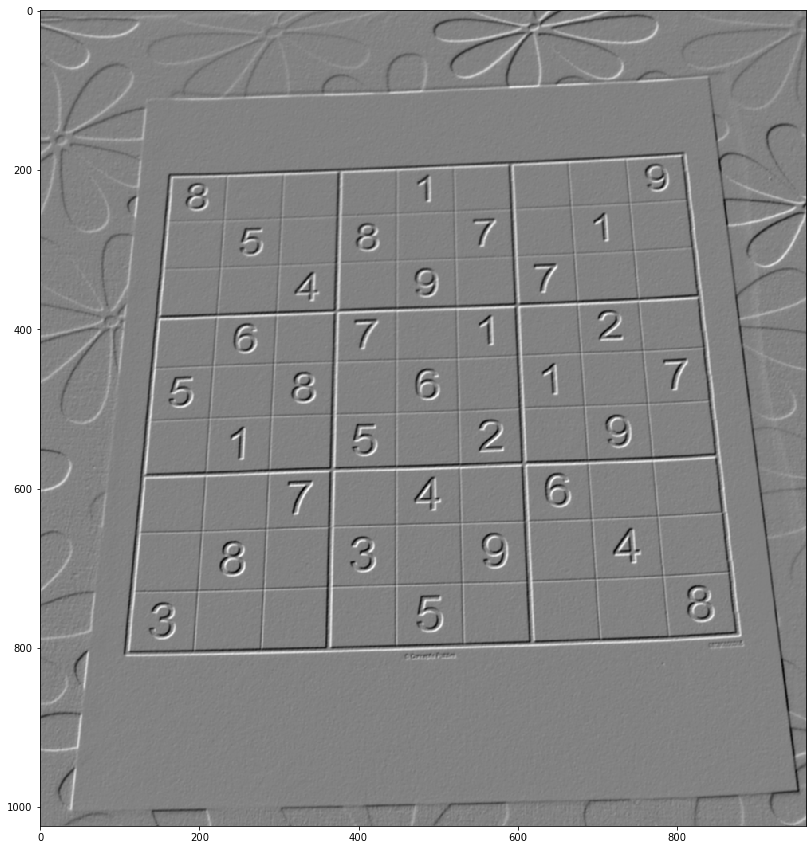

In [8]:
sob_img = sob_img_x + sob_img_y
disp(sob_img)

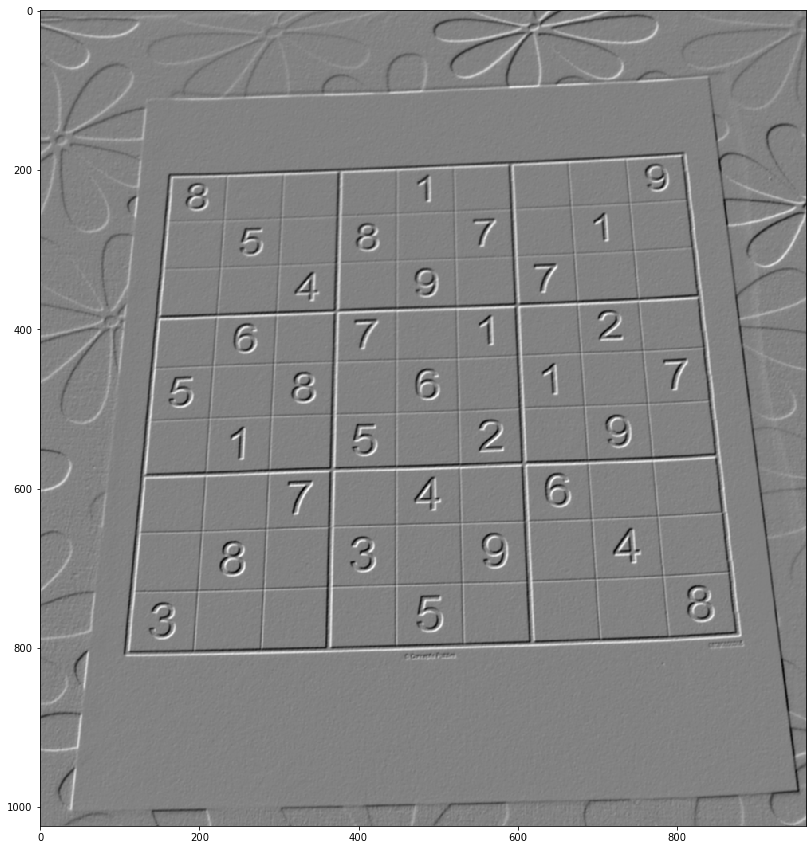

In [9]:
# Using addWeighted
# Significance - choose the alpha and beta values for blending x and y
sob_img2 = cv2.addWeighted(sob_img_x, 0.5, sob_img_y, 0.5, gamma = 0)
disp(sob_img2)

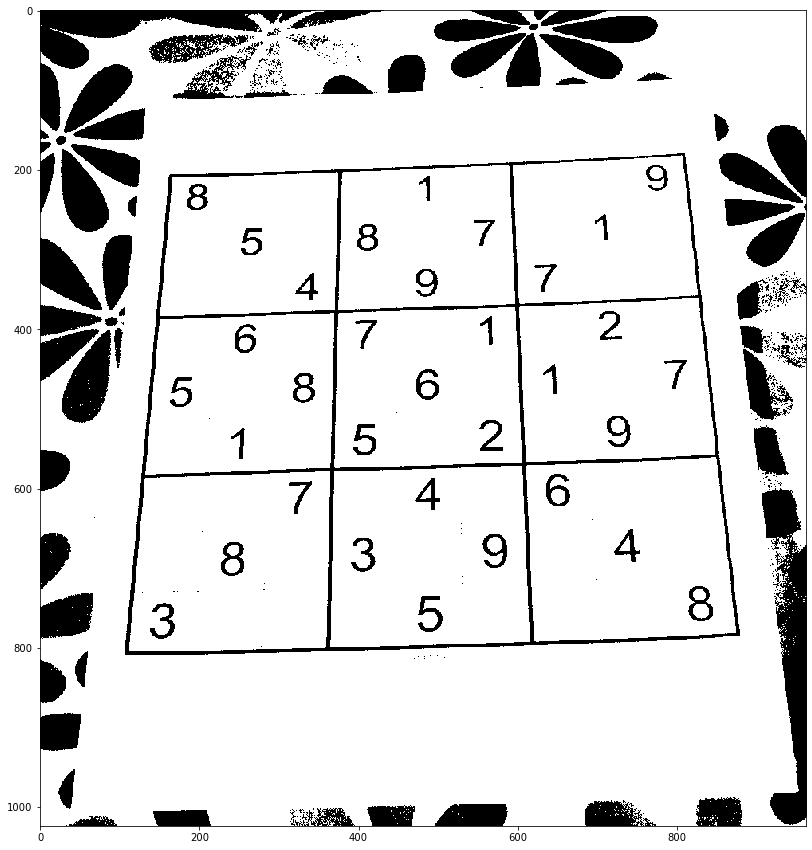

In [16]:
# Using a threshold
ret, thresh_img = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY)
disp(thresh_img)

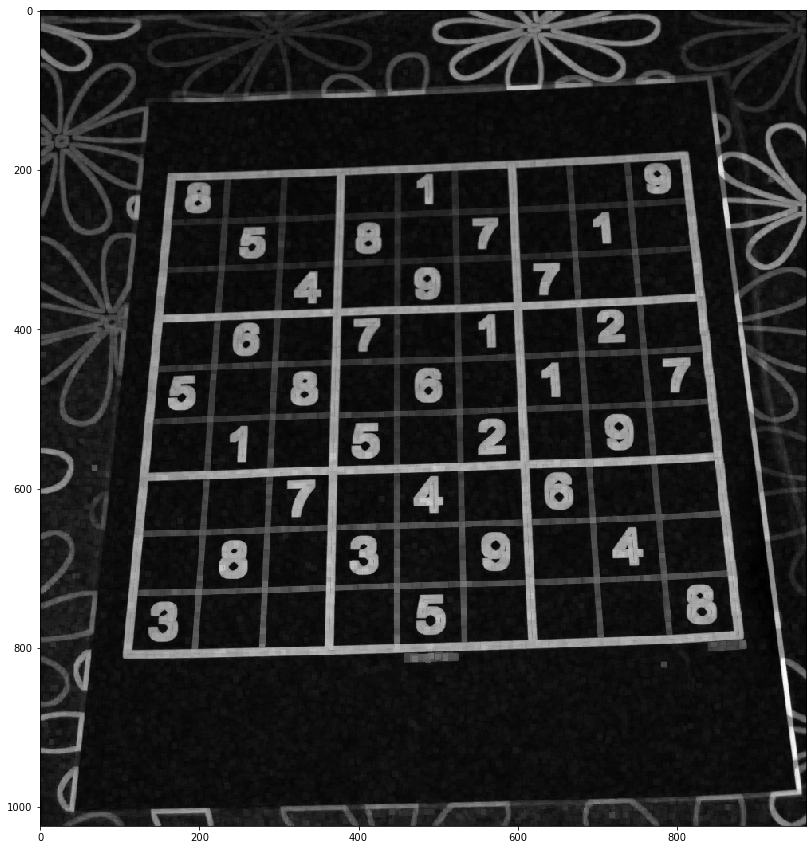

In [17]:
# Using morphology
kernel = np.ones((4, 4), dtype = np.uint8)
grad_img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel, iterations = 2)
disp(grad_img)